In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/advertisement-and-sales-data-for-analysis/Advertising And Sales.csv


# 1. Clearing Data

Check the shape and summary stats and look for any missing values or errors.

In [2]:
paths = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname,filename)
        paths.append(path)
try:
    if not paths:
        raise ValueError("The list is empty.")
    else:
        df = pd.read_csv(paths[0])
        
except ValueError as e:
    print(e)

In [3]:
df.head(5)

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [4]:
df.describe()

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.00000,200.000000,200.0000
mean,100.500000,147.032500,23.28950,30.554000,14.0380
std,57.879185,85.885186,14.86997,21.778621,5.2094
min,1.000000,0.700000,0.00000,0.300000,1.6000
25%,50.750000,74.375000,10.07500,12.750000,10.4000
50%,100.500000,149.750000,22.90000,25.750000,12.9000
75%,150.250000,218.825000,36.52500,45.100000,17.4000
max,200.000000,296.400000,49.60000,114.000000,27.0000


# * Check for NAN values

In [5]:
df_row_mask= df.isna().any(axis=1)
rows_with_nan = df[df_row_mask]
rows_with_nan.head()

,ID,TV,Radio,Newspaper,Sales


In [6]:
df_columns_mask= df.isna().any(axis=0)
df.columns[df_columns_mask]

Index([], dtype='object')

When doing further analysis, we need to be careful of the sales values which were duplicated when attaching the sales column to the melted table.

# 2. Data Visualisation

# * Correlation

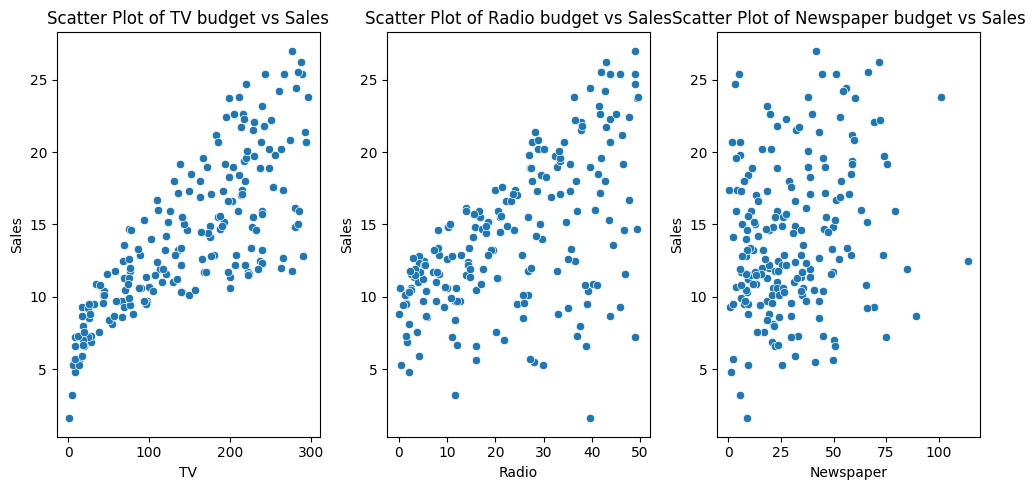

In [7]:
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data= df)
plt.title('Scatter Plot of TV budget vs Sales')

# Scatter plot for second pair
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data= df)
plt.title('Scatter Plot of Radio budget vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data= df)
plt.title('Scatter Plot of Newspaper budget vs Sales')
# Show the plots
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Values', data=df)

plt.title('Box Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')

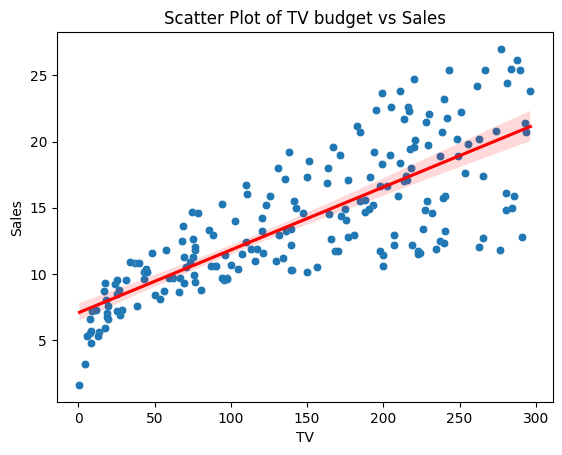

In [8]:
sns.scatterplot(x='TV', y='Sales', data= df)
plt.title('Scatter Plot of TV budget vs Sales')
sns.regplot(x='TV', y='Sales', data=df, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.show()

There is a strong correlation between budget and sales.

# * Budget Analysis

In [9]:
df_melted = df.melt(id_vars='ID', value_vars=['TV', 'Radio','Newspaper'], var_name='Category', value_name='Budget')
df_melted

,ID,Category,Budget
0,1,TV,230.1
1,2,TV,44.5
2,3,TV,17.2
3,4,TV,151.5
4,5,TV,180.8
...,...,...,...
595,196,Newspaper,13.8
596,197,Newspaper,8.1
597,198,Newspaper,6.4
598,199,Newspaper,66.2


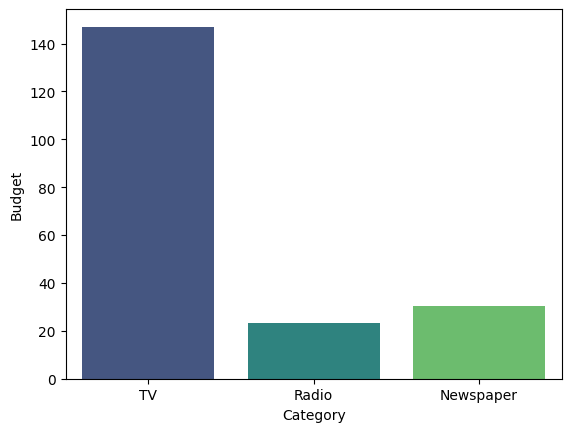

In [10]:
sns.barplot(x='Category', y='Budget', data=df_melted, errorbar=None, palette='viridis')
plt.show()

<Axes: xlabel='Category', ylabel='Budget'>

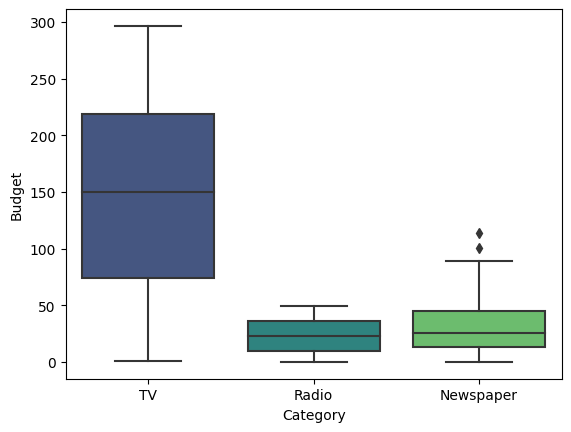

In [11]:
sns.boxplot(x='Category', y='Budget', data=df_melted, palette='viridis')

# 3. Analysis Conclusions

The budget for TV is much higher with a greater variance.
Further analysis should look at the impact of each media stream on sales.
Unfortunally this data set does not have enough data for attribution modelling.